
### **CS4287: Neural Networks**


####Assignment 2: Convolutional Neural Network

##### Ranya El-Hwigi (18227449) Nutsa Chichilidze (18131956) 



---

Code runs to completion

Some of our implementation took inspiration from the following example: https://github.com/niconielsen32/NeuralNetworks/blob/main/transferLearning.ipynb

### **Setting up the environment**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]), 
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"), 
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"), 
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.Dense(10, activation="softmax")])

In [ ]:
class0 = 10/30
class1 = 20/30
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * math.log2(class1))

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/config/experimental/set_memory_growth 
physical_devices = tf.config.list_physical_devices('GPU')
try:
  print("Num GPUs Available: ", len(physical_devices))
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print("Invalid device or cannot modify virtual devices once initialized.")
  pass

print("The version of Tensorflow available: ", tf.__version__)

Num GPUs Available:  1
The version of Tensorflow available:  2.7.0


### **Data loading, analyzing and preprocessing**

In [ ]:
tfds.disable_progress_bar()

# We are reserving 10% of the loaded data for validation and 10% for testing
# This dataset is a built in tensorflow dataset that contains images of cats and dogs

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True, 
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteHDY9O7/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# Counting how many samples we have in each partition of our dataset 

number_of_train_samples = tf.data.experimental.cardinality(train_ds)
number_of_validation_samples = tf.data.experimental.cardinality(validation_ds)
number_of_test_samples = tf.data.experimental.cardinality(test_ds)
total_samples = number_of_train_samples + number_of_validation_samples + number_of_test_samples

print("Total samples: %d" % total_samples)
print("Number of training samples: %d" % number_of_train_samples)
print("Number of validation samples: %d" % number_of_validation_samples)
print("Number of test samples: %d" % number_of_test_samples)

Total samples: 13957
Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


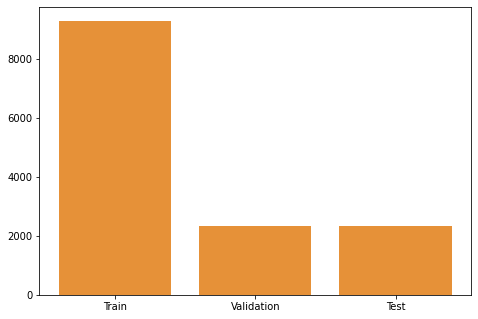

In [ ]:
# plotting the distribution of data between the sets

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sets = ['Train', 'Validation', 'Test']
samples = [number_of_train_samples, number_of_validation_samples, number_of_test_samples]
ax.bar(sets,samples, color="#e69138")
plt.show()

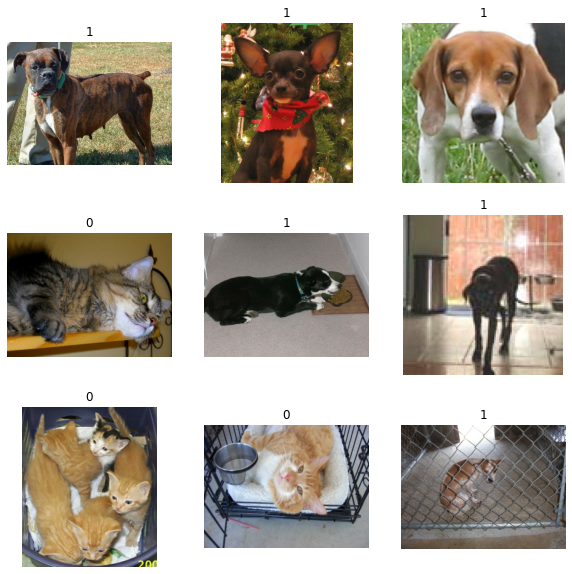

In [ ]:
# visualising the dataset, we can see the images it contains and the labels each of these images have
# 1 = dog, 0 = cat

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

Total number of cats:  1177
Total number of dogs:  1149


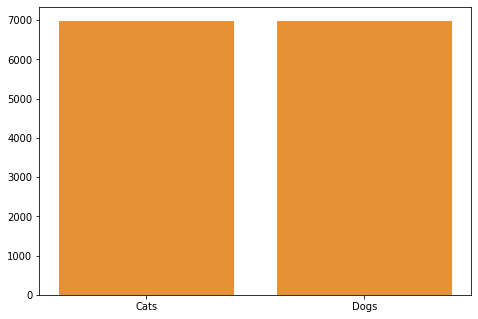

6989


In [ ]:
# collecting information on the number of cats and dogs in each set
cats_train = 0 
dogs_train = 0 
for i, (image, label) in enumerate(train_ds):
    if (int(label) == 1): 
      dogs_train += 1
    else: 
      cats_train += 1
cats_val = 0 
dogs_val = 0 
for i, (image, label) in enumerate(validation_ds):
    if (int(label) == 1): 
      dogs_val += 1
    else: 
      cats_val += 1
cats_test = 0 
dogs_test = 0 
for i, (image, label) in enumerate(test_ds):
    if (int(label) == 1): 
      dogs_test += 1
    else: 
      cats_test += 1
total_cats = cats_train + cats_val + cats_test
total_dogs = dogs_train + dogs_val + dogs_test
print("Total number of cats: ", cats_test)
print("Total number of dogs: ", dogs_test)

# plotting the distribution of cats and dogs in the complete dataset
fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
classes = ['Cats', 'Dogs']
num_of_samples = [total_cats, total_dogs]
ax_2.bar(classes, num_of_samples, color="#e69138")
plt.show()
print(total_cats)

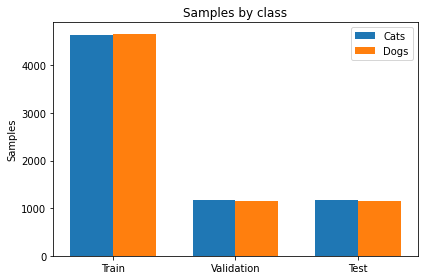

In [ ]:
# plotting the number of cats and dogs in each set
labels = ['Train', 'Validation', 'Test']
cats = [cats_train, cats_val, cats_test]
dogs = [dogs_train, dogs_val, dogs_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cats, width, label='Cats')
rects2 = ax.bar(x + width/2, dogs, width, label='Dogs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Samples')
ax.set_title('Samples by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# resizing all images to 150x150 square images
size = (150, 150)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
# 32 samples will processes before the model weights are updated
batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [ ]:
# performing data augmentation to artificially generate more training samples
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

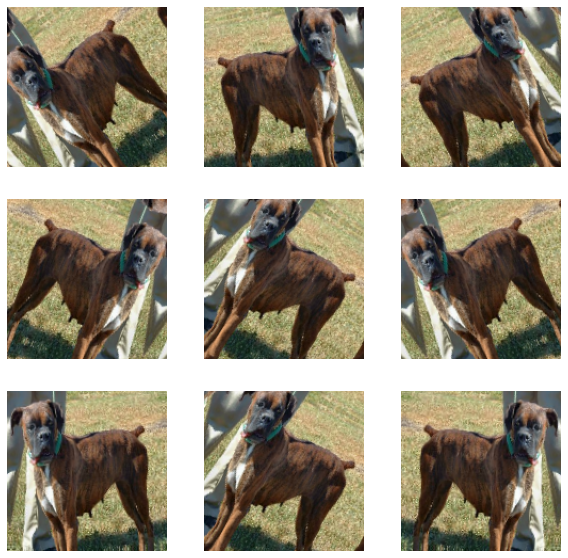

In [ ]:
# extracting example of data augmentation
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")


**Initializing the pre-trained XCeption model**


We initialize a base model using the pre-trained XCeption architecture.
The model has been trained using the ImageNet dataset which is a very large image dataset containing millions of images divided over around 1000 classes, this dataset also includes images of dogs and cats, which allowed us to be confident that this pre-trained model would be useful for the dataset we are working with.


In [ ]:
image_height = 150
image_width = 150

base_model = keras.applications.Xception( weights="imagenet", input_shape=(image_width, image_height, 3), include_top=False)  

base_model.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


**Adding layers on top of the base model and printing the summary**

In [ ]:
# Create new model on top
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  

# Adding the normalization layer: 
# It performs the calculation outputs = (inputs - mean) / sqrt(var) and scales inputs from -1 to +1

mean = np.array([127.5] * 3)
var = mean ** 2

norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)

# Adding a GlobalAveragePolling2D and Dropout Layers
# Setting training to inference mode to make sure that the base model 
# isn't being re-trained to keep it's accuracy and learning 

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 normalization (Normalizatio  (None, 150, 150, 3)      0         
 n)                                                              
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0     

In [ ]:
metrics=[keras.metrics.BinaryAccuracy(name='binary_accuracy'), keras.metrics.AUC(name='auc'), keras.metrics.FalseNegatives(name='FN'), keras.metrics.FalsePositives(name='FP'),
keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall'), keras.metrics.TruePositives(name='TP'), keras.metrics.TrueNegatives(name='TN')],

In [ ]:
# compiling the model with the adam optimizer 
# for metrics we chose to display the binary accuracy of the model at each epoch
# as well as the metrics for false negatives, precision, recall, true positives and true negatives. 
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=metrics,
)

epochs = 6
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 95s 209ms/step - loss: 0.1683 - binary_accuracy: 0.9278 - auc: 0.9834 - false_negatives: 300.0000 - false_positives: 372.0000 - precision: 0.9215 - recall: 0.9357 - true_positives: 4368.0000 - true_negatives: 4265.0000 - val_loss: 0.0833 - val_binary_accuracy: 0.9682 - val_auc: 0.9955 - val_false_negatives: 35.0000 - val_false_positives: 39.0000 - val_precision: 0.9662 - val_recall: 0.9696 - val_true_positives: 1116.0000 - val_true_negatives: 1136.0000
Epoch 2/6
291/291 [==============================] - 56s 193ms/step - loss: 0.1196 - binary_accuracy: 0.9498 - auc: 0.9912 - false_negatives: 225.0000 - false_positives: 242.0000 - precision: 0.9483 - recall: 0.9518 - true_positives: 4443.0000 - true_negatives: 4395.0000 - val_loss: 0.0810 - val_binary_accuracy: 0.9682 - val_auc: 0.9962 - val_false_negatives: 20.0000 - val_false_positives: 54.0000 - val_precision: 0.9544 - val_recall: 0.9826 - val_true_positives: 1131.0000 - val_true_negatives: 

In [ ]:
# here we are unfreezing the base model to allow for it to be trained with our dataset 

base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=metrics,
)

epochs = 3
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 normalization (Normalizatio  (None, 150, 150, 3)      0         
 n)                                                              
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 207s 675ms/step - loss: 0.0816 - binary_accuracy: 0.9681 - auc_1: 0.9956 - false_negatives_1: 148.0000 - false_positives_1: 149.0000 - precision_1: 0.9681 - recall_1: 0.9683 - true_positives_1: 4520.0000 - true_negatives_1: 4488.0000 - val_loss: 0.0493 - val_binary_accuracy: 0.9781 - val_auc_1: 0.9986 - val_false_negatives_1: 21.0000 - val_false_positives_1: 30.0000 - val_precision_1: 0.9741 - val_recall_1: 0.9818 - val_true_positives_1: 1130.0000 - val_true_negatives_1: 1145.0000
Epoch 2/3
291/291 [==============================] - 193s 664ms/step - loss: 0.0570 - binary_accuracy: 0.9779 - auc_1: 0.9974 - false_negatives_1: 103.0000 - false_positives_1: 103.0000 - precision_1: 0.9779 - recall_1: 0.9779 - true_positives_1: 4565.0000 - true_negatives_1: 4534.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9811 - val_auc_1: 0.9983 - val_false_negatives_1: 11.0000 - val_false_positives_1: 33.0000 - val_precision_1: 0.9719 - val_recall_1: 0.9904 

In [ ]:
# plotting the metrics obtained from our model 

score = model.evaluate(test_ds)
print("\nTest score:", score[0])
print("Test accuracy:", score[1])
print("Area under the curve: ", score[2])
print("Number of false negatives: ", score[3])
print("Number of false positives:", score[4])
print("Precision: ", score[5])
print("Recall: ", score[6])
print("True positives: ", score[7])
print("True negatives: ", score[8])

73/73 [==============================] - 11s 150ms/step - loss: 0.0687 - binary_accuracy: 0.9751 - auc_1: 0.9963 - false_negatives_1: 18.0000 - false_positives_1: 40.0000 - precision_1: 0.9658 - recall_1: 0.9843 - true_positives_1: 1131.0000 - true_negatives_1: 1137.0000

Test score: 0.06868473440408707
Test accuracy: 0.9750645160675049
Area under the curve:  0.9962683320045471
Number of false negatives:  18.0
Number of false positives: 40.0
Precision:  0.9658411741256714
Recall:  0.9843342304229736
True positives:  1131.0
True negatives:  1137.0


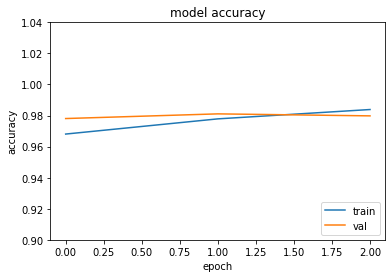

In [ ]:
# plotting the change in binary accuracy and validation binary accuracy thoughout the training process
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

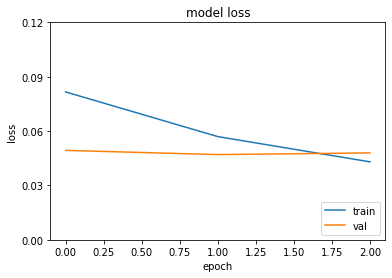

In [ ]:
# plotting the change in loss and validation_loss thoughout the training process

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0, 0.15, 0.03))
plt.show()

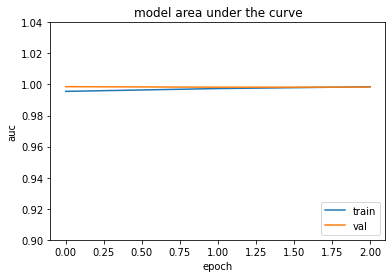

In [ ]:
# plotting the change in area under the curve and validation area under the curve the training process

plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('model area under the curve')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

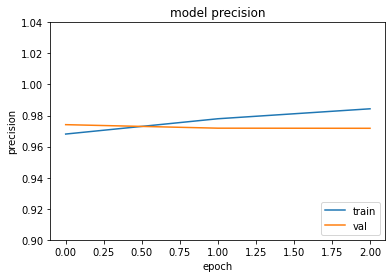

In [ ]:
# plotting the change in precision and validation precision thoughout the training process

plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

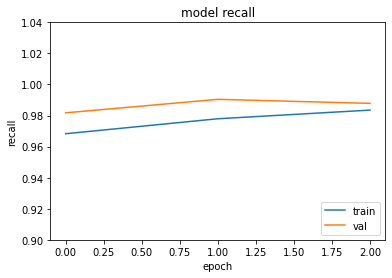

In [ ]:
# plotting the change in recall and validation recall thoughout the training process

plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

In [ ]:
# formating confusion matrix
TP = int(score[7])
FP = int(score[4])
TN = int(score[8])
FN = int(score[3])
CP = TP+FN
CN = TN+FP
RN = TN+FN
RP = TP+FP
N = CP+CN
labels = ["Dog", "Cat", " "] 
data = [[TP, FN, CP],
[FP, TN, CN],
[RN, RP, N]]
format_row = "{:>7}" * (len(labels) + 1)
print(format_row.format("", *labels))
for label, row in zip(labels, data):
  print(format_row.format(label, *row))

2326
                     Dog         Cat            
         Dog        1125          31        1156
         Cat          24        1146        1170
                    1149        1177        2326


### **Hyper-parameter tuning**
building more models, trying different values of dropout rate, epochs, dense layers & activation function

In [ ]:
# MODEL 2 
# let's build a model with a higher dropout rate, previous was 0.2

new_dropout_rate = 0.4 

image_height = 150
image_width = 150

# re-loading the base model
base_model_2 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_2.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  

mean = np.array([127.5] * 3)
var = mean ** 2

# adding layers to the new base model
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_2(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(new_dropout_rate)(x)  #setting the new dropout rate here
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model_2 = keras.Model(inputs, outputs)

# compiling the new model
model_2.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 6

# training the new model
model_2.fit(train_ds, epochs=epochs, validation_data=validation_ds)

base_model_2.trainable = True

# recompiling with the base model not in inference mode anymore
model_2.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 3
model_2.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 57s 184ms/step - loss: 0.1800 - binary_accuracy: 0.9224 - val_loss: 0.0860 - val_binary_accuracy: 0.9686
Epoch 2/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1367 - binary_accuracy: 0.9458 - val_loss: 0.0790 - val_binary_accuracy: 0.9703
Epoch 3/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1247 - binary_accuracy: 0.9496 - val_loss: 0.0748 - val_binary_accuracy: 0.9699
Epoch 4/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1108 - binary_accuracy: 0.9550 - val_loss: 0.0726 - val_binary_accuracy: 0.9712
Epoch 5/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1122 - binary_accuracy: 0.9531 - val_loss: 0.0778 - val_binary_accuracy: 0.9690
Epoch 6/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1115 - binary_accuracy: 0.9557 - val_loss: 0.0742 - val_binary_accuracy: 0.9695
Epoch 1/3
291/291 [==============================] - 198s 661m

In [ ]:
# MODEL 3
# In this model, we try a higher dropout rate, previous was 0.4 

new_dropout_rate = 0.6 

# re-loading the base model
base_model_3 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_3.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  


mean = np.array([127.5] * 3)
var = mean ** 2
 
# adding layers 
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_3(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(new_dropout_rate)(x)  #higher dropout rate set here
x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model_3 = keras.Model(inputs, outputs)

# compiling with base model in inference mode
model_3.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 6
model_3.fit(train_ds, epochs=epochs, validation_data=validation_ds)

# unfreezing base model - recompiling/training 
base_model_3.trainable = True
model_3.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 3
model_3.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 57s 184ms/step - loss: 0.1962 - binary_accuracy: 0.9166 - val_loss: 0.0845 - val_binary_accuracy: 0.9678
Epoch 2/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1432 - binary_accuracy: 0.9389 - val_loss: 0.0795 - val_binary_accuracy: 0.9690
Epoch 3/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1382 - binary_accuracy: 0.9449 - val_loss: 0.0768 - val_binary_accuracy: 0.9673
Epoch 4/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1272 - binary_accuracy: 0.9509 - val_loss: 0.0747 - val_binary_accuracy: 0.9699
Epoch 5/6
291/291 [==============================] - 53s 181ms/step - loss: 0.1314 - binary_accuracy: 0.9467 - val_loss: 0.0773 - val_binary_accuracy: 0.9686
Epoch 6/6
291/291 [==============================] - 53s 181ms/step - loss: 0.1310 - binary_accuracy: 0.9471 - val_loss: 0.0727 - val_binary_accuracy: 0.9708
Epoch 1/3
291/291 [==============================] - 199s 661m

We can see that growing the dropout rate in previous models caused a slight drop in the binary accuracy of our model, therefore will stick to the initial rate of 20%

Next we'll tune the unit value of the dense layer on top of our base model and change it from 1 to 0

In [ ]:
# MODEL 4
# let's build a model with an activation function RELU added to the dense layer 

# re-loading the base model
base_model_4 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_4.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  

mean = np.array([127.5] * 3)
var = mean ** 2

# adding new layers on top 
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_4(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  #dropout rate went back to the original value
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='relu')(x) #relu added to the dense layer here

model_4 = keras.Model(inputs, outputs)

# training with the base model in inference mode
model_4.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 3

# unfreezing the base model, retraining 
model_4.fit(train_ds, epochs=epochs, validation_data=validation_ds)

base_model_4.trainable = True

model_4.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 2
model_4.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/3
291/291 [==============================] - 57s 184ms/step - loss: 0.4335 - binary_accuracy: 0.9250 - val_loss: 0.3979 - val_binary_accuracy: 0.9665
Epoch 2/3
291/291 [==============================] - 52s 180ms/step - loss: 0.4060 - binary_accuracy: 0.9454 - val_loss: 0.3859 - val_binary_accuracy: 0.9716
Epoch 3/3
291/291 [==============================] - 53s 181ms/step - loss: 0.4014 - binary_accuracy: 0.9528 - val_loss: 0.3855 - val_binary_accuracy: 0.9703
Epoch 1/2
291/291 [==============================] - 195s 652ms/step - loss: 0.3903 - binary_accuracy: 0.9596 - val_loss: 0.3736 - val_binary_accuracy: 0.9768
Epoch 2/2
291/291 [==============================] - 189s 648ms/step - loss: 0.3764 - binary_accuracy: 0.9706 - val_loss: 0.3682 - val_binary_accuracy: 0.9819


Adding the activation function to our layer reduced our binary accuracy and significantly increased our loss score, therefore we avoid doing this for our final model. 

Next, we'll identify the impact of the number of epochs when training our model. 

In [ ]:
# MODEL 5
# Increasing the number of epochs when training our model 

# setting up new values for the epochs (original were 6 and 3)
epochs_stage_1 = 8
epochs_stage_2 = 5

# reloading the base model
base_model_5 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_5.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  

mean = np.array([127.5] * 3)
var = mean ** 2

# adding new layers 
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_5(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model_5 = keras.Model(inputs, outputs)

# training with base model in inference mode
model_5.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_1

model_5.fit(train_ds, epochs=epochs, validation_data=validation_ds)

# unfreezing the base model, retraining 
base_model_5.trainable = True

model_5.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_2
model_5.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 57s 183ms/step - loss: 0.1713 - binary_accuracy: 0.9278 - val_loss: 0.0845 - val_binary_accuracy: 0.9686
Epoch 2/8
291/291 [==============================] - 52s 180ms/step - loss: 0.1180 - binary_accuracy: 0.9514 - val_loss: 0.0791 - val_binary_accuracy: 0.9686
Epoch 3/8
291/291 [==============================] - 52s 180ms/step - loss: 0.1128 - binary_accuracy: 0.9539 - val_loss: 0.0742 - val_binary_accuracy: 0.9690
Epoch 4/8
291/291 [==============================] - 52s 180ms/step - loss: 0.1084 - binary_accuracy: 0.9548 - val_loss: 0.0716 - val_binary_accuracy: 0.9699
Epoch 5/8
291/291 [==============================] - 53s 181ms/step - loss: 0.1020 - binary_accuracy: 0.9584 - val_loss: 0.0730 - val_binary_accuracy: 0.9738
Epoch 6/8
291/291 [==============================] - 52s 181ms/step - loss: 0.1036 - binary_accuracy: 0.9584 - val_loss: 0.0741 - val_binary_accuracy: 0.9690
Epoch 7/8
291/291 [==============================] - 52s 180ms

In [ ]:
# MODEL 6
# Decreasing the number of epochs when training our model 

# new values set here
epochs_stage_1 = 4
epochs_stage_2 = 3

base_model_6 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_6.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  


mean = np.array([127.5] * 3)
var = mean ** 2

# adding new layers to the top of the base model 
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_6(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model_6 = keras.Model(inputs, outputs)

# training with the base model in inference mode 
model_6.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_1

# unfreezing the base model, retraining 
model_6.fit(train_ds, epochs=epochs, validation_data=validation_ds)

base_model_6.trainable = True

model_6.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_2
model_6.fit(train_ds, epochs=epochs, validation_data=validation_ds)


Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 57s 183ms/step - loss: 0.1717 - binary_accuracy: 0.9278 - val_loss: 0.0831 - val_binary_accuracy: 0.9660
Epoch 2/4
291/291 [==============================] - 52s 180ms/step - loss: 0.1189 - binary_accuracy: 0.9511 - val_loss: 0.0767 - val_binary_accuracy: 0.9660
Epoch 3/4
291/291 [==============================] - 52s 180ms/step - loss: 0.1129 - binary_accuracy: 0.9543 - val_loss: 0.0752 - val_binary_accuracy: 0.9669
Epoch 4/4
291/291 [==============================] - 52s 180ms/step - loss: 0.1083 - binary_accuracy: 0.9555 - val_loss: 0.0710 - val_binary_accuracy: 0.9699
Epoch 1/3
291/291 [==============================] - 199s 663ms/step - loss: 0.0880 - binary_accuracy: 0.9638 - val_loss: 0.0473 - val_binary_accuracy: 0.9789
Epoch 2/3
291/291 [==============================] - 192s 659ms/step - loss: 0.0559 - binary_accuracy: 0.9805 - val_loss: 0.0431 - val_binary_accuracy: 0.9832
Epoch 3/3
291/291 [==============================] - 192s 66

In [ ]:
# MODEL 7
# Changing the learning rate for the ADAM optimizer  

# reset the epochs back to the original values 
epochs_stage_1 = 6
epochs_stage_2 = 3

adam_new_learning_rate = 0.0001 
# reloading the base model
base_model_7 = keras.applications.Xception(weights="imagenet", 
                                         input_shape=(image_width, image_height, 3), 
                                         include_top=False)  

base_model_7.trainable = False
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  


mean = np.array([127.5] * 3)
var = mean ** 2

# adding layers on top of the base model
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)
x = base_model_7(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(1)(x)
model_7 = keras.Model(inputs, outputs)

# training with base model in inference mode
model_7.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_1
model_7.fit(train_ds, epochs=epochs, validation_data=validation_ds)

# unfreezing the base model, retraining 
base_model_7.trainable = True

model_7.compile(
    optimizer=keras.optimizers.Adam(adam_new_learning_rate),  # new learning rate set here 
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = epochs_stage_2
model_7.fit(train_ds, epochs=epochs, validation_data=validation_ds)



Epoch 1/6
291/291 [==============================] - 57s 183ms/step - loss: 0.1660 - binary_accuracy: 0.9248 - val_loss: 0.0814 - val_binary_accuracy: 0.9686
Epoch 2/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1144 - binary_accuracy: 0.9524 - val_loss: 0.0764 - val_binary_accuracy: 0.9708
Epoch 3/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1123 - binary_accuracy: 0.9516 - val_loss: 0.0746 - val_binary_accuracy: 0.9725
Epoch 4/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1094 - binary_accuracy: 0.9521 - val_loss: 0.0723 - val_binary_accuracy: 0.9721
Epoch 5/6
291/291 [==============================] - 52s 180ms/step - loss: 0.1105 - binary_accuracy: 0.9535 - val_loss: 0.0711 - val_binary_accuracy: 0.9708
Epoch 6/6
291/291 [==============================] - 52s 180ms/step - loss: 0.0998 - binary_accuracy: 0.9578 - val_loss: 0.0695 - val_binary_accuracy: 0.9729
Epoch 1/3
291/291 [==============================] -

FINAL MODEL: 

the model we ended up with after hyper-parameter tuning 

In [ ]:
metrics=[keras.metrics.BinaryAccuracy(name='binary_accuracy'), keras.metrics.AUC(name='auc'), keras.metrics.FalseNegatives(name='FN'), keras.metrics.FalsePositives(name='FP'),
keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall'), keras.metrics.TruePositives(name='TP'), keras.metrics.TrueNegatives(name='TN')],

In [ ]:
image_height = 150
image_width = 150

base_best_model = keras.applications.Xception(weights="imagenet", input_shape=(image_width, image_height, 3), include_top=False)  

base_best_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(image_width, image_height, 3))
x = data_augmentation(inputs)  

# Adding the normalization layer: 
# It performs the calculation outputs = (inputs - mean) / sqrt(var) and scales inputs from -1 to +1

mean = np.array([127.5] * 3)
var = mean ** 2

norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, mean=mean, variance=var
)
x = norm_layer(x)

# Adding a GlobalAveragePolling2D and Dropout Layers
# Setting training to inference mode to make sure that the base model 
# isn't being re-trained to keep it's accuracy and learning 

x = base_best_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
best_model = keras.Model(inputs, outputs)

best_model.summary()

# compiling the model with the adam optimizer 
# for metrics we chose to display the binary accuracy of the model at each epoch
# as well as the metrics for false negatives, precision, recall, true positives and true negatives. 
best_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=metrics)

epochs = 8

best_model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

# here we are unfreezing the base model to allow for it to be trained with our dataset 

base_best_model.trainable = True
best_model.summary()


best_model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=metrics
)

epochs = 5

best_model_history = best_model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 normalization_8 (Normalizat  (None, 150, 150, 3)      0         
 ion)                                                            
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 63s 199ms/step - loss: 0.1637 - binary_accuracy: 0.9325 - auc: 0.9843 - FN: 273.0000 - FP: 355.0000 - precision: 0.9253 - recall: 0.9415 - TP: 4395.0000 - TN: 4282.0000 - val_loss: 0.0820 - val_binary_accuracy: 0.9673 - val_auc: 0.9958 - val_FN: 27.0000 - val_FP: 49.0000 - val_precision: 0.9582 - val_recall: 0.9765 - val_TP: 1124.0000 - val_TN: 1126.0000
Epoch 2/8
291/291 [==============================] - 56s 192ms/step - loss: 0.1190 - binary_accuracy: 0.9511 - auc: 0.9912 - FN: 220.0000 - FP: 235.0000 - precision: 0.9498 - recall: 0.9529 - TP: 4448.0000 - TN: 4402.0000 - val_loss: 0.0763 - val_binary_accuracy: 0.9703 - val_auc: 0.9959 - val_FN: 31.0000 - val_FP: 38.0000 - val_precision: 0.9672 - val_recall: 0.9731 - val_TP: 1120.0000 - val_TN: 1137.0000
Epoch 3/8
291/291 [==============================] - 56s 191ms/step - loss: 0.1124 - binary_accuracy: 0.9537 - auc: 0.9922 - FN: 211.0000 - FP: 220.0000 - precision: 0.9530 - recall: 0.9548 

73/73 [==============================] - 12s 158ms/step - loss: 0.0698 - binary_accuracy: 0.9789 - auc: 0.9957 - FN: 22.0000 - FP: 27.0000 - precision: 0.9766 - recall: 0.9809 - TP: 1127.0000 - TN: 1150.0000

Test score: 0.06980997323989868
Test accuracy: 0.9789338111877441
Area under the curve:  0.995703935623169
Number of false negatives:  22.0
Number of false positives: 27.0
Precision:  0.976603090763092
Recall:  0.9808529019355774
True positives:  1127.0
True negatives:  1150.0


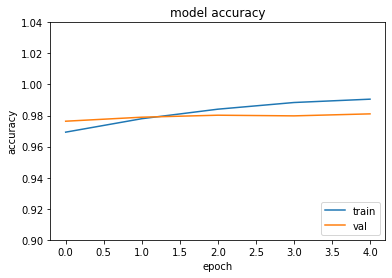

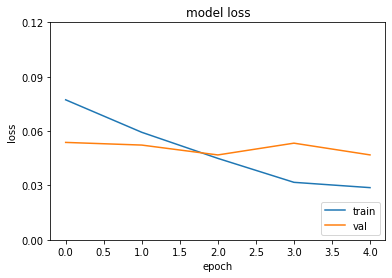

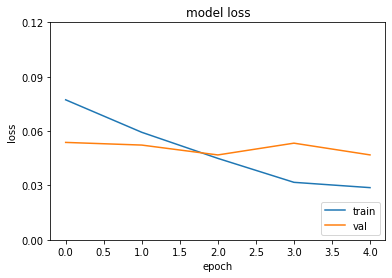

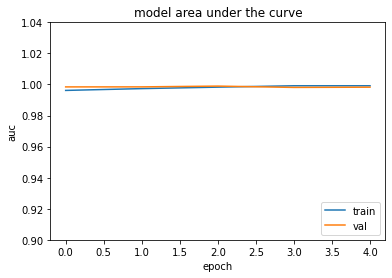

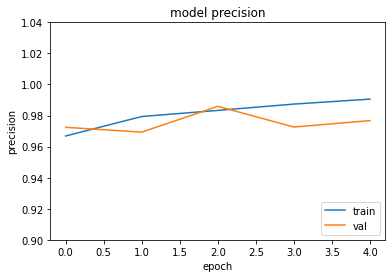

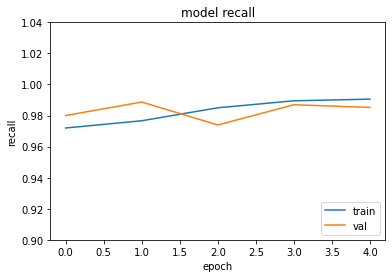

           Dog    Cat       
    Dog   1127     22   1149
    Cat     27   1150   1177
          1172   1154   2326


In [ ]:
# plotting the metrics obtained from our FINAL  model 

score = best_model.evaluate(test_ds)
print("\nTest score:", score[0])
print("Test accuracy:", score[1]) 
print("Area under the curve: ", score[2])
print("Number of false negatives: ", score[3])
print("Number of false positives:", score[4])
print("Precision: ", score[5])
print("Recall: ", score[6])
print("True positives: ", score[7])
print("True negatives: ", score[8])


# plotting the change in binary accuracy and validation binary accuracy thoughout the training process

plt.plot(best_model_history.history['binary_accuracy'])
plt.plot(best_model_history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

# plotting the change in loss and validation_loss thoughout the training process

plt.plot(best_model_history.history['loss'])
plt.plot(best_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0, 0.15, 0.03))
plt.show()


# plotting the change in loss and validation_loss thoughout the training process

plt.plot(best_model_history.history['loss'])
plt.plot(best_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0, 0.15, 0.03))
plt.show()

# plotting the change in area under the curve and validation area under the curve the training process

plt.plot(best_model_history.history['auc'])
plt.plot(best_model_history.history['val_auc'])
plt.title('model area under the curve')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

# plotting the change in precision and validation precision thoughout the training process

plt.plot(best_model_history.history['precision'])
plt.plot(best_model_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()

# plotting the change in recall and validation recall thoughout the training process

plt.plot(best_model_history.history['recall'])
plt.plot(best_model_history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.yticks(np.arange(0.90, 1.05, 0.02))
plt.show()


# formating confusion matrix
TP = int(score[7])
FP = int(score[4])
TN = int(score[8])
FN = int(score[3])
CP = TP+FN
CN = TN+FP
RN = TN+FN
RP = TP+FP
N = CP+CN
labels = ["Dog", "Cat", " "] 
data = [[TP, FN, CP],
[FP, TN, CN],
[RN, RP, N]]
format_row = "{:>7}" * (len(labels) + 1)
print(format_row.format("", *labels))
for label, row in zip(labels, data):
  print(format_row.format(label, *row))